In [1]:
import numpy as np
import pandas as pd
import json
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

Solving environment: done

## Package Plan ##

  environment location: /Users/timleung/opt/anaconda3

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.0               |   py38h50d1736_1         3.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following packages will be UPDATED:

  conda                                4.9.2-py38h50d1736_0 --> 4.10.0-py38h50d1736_1



conda-4.10.0         | 3.1 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [2]:
## Establish Foursqaure connection criteria
CLIENT_ID = 'MQTFBZP2RL1MXT25Q0PXMECSDPMBBG1CQJ3PCUATE53DPPP3' # your Foursquare ID
CLIENT_SECRET = '0XIKSWAPVQBFL0KDCNG2PPXPOSBJ1YH3RHPTFQVFGXUNIFL0' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [3]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [33]:
##establish dataframe
Borough = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']
df = pd.DataFrame(columns = ['Borough',"longitude","latitude","population","# of Food venues","land area"])
df['Borough'] = Borough

LIMIT = 250


geolocator = Nominatim(user_agent="ny_explorer")

#go through each New York borough and get the number of food venues in each borough
for index, row in df.iterrows():
    ##find longtitude and latitude for each borough
    location = geolocator.geocode(df.loc[index,"Borough"]+", NY")
    df.loc[index,"longitude"] = location.longitude
    df.loc[index,"latitude"] = location.latitude
    
    ##submit venue search request to FourSquare
    ACCESS_TOKEN = '2SUIY5F3SO1UXMIG0ALM1MTXZM4ZOXLO5DRPVNZJ2IYUIPCA' # your FourSquare Access Token
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, location.latitude, location.longitude,ACCESS_TOKEN, VERSION,LIMIT)
    results = requests.get(url).json()
    
    ##clean data and extract category
    venues = pd.json_normalize(results['response']['venues'])
    venues['categories1'] = venues.apply(get_category_type, axis=1)
    
    ##count number of Food venues exist in each borough
    group_venues = venues.groupby('categories1').count()
    
    restaurant = 0
    
    if 'Fast Food Restaurant' in group_venues.index:
        restaurant = restaurant + group_venues.loc['Fast Food Restaurant','categories']

    if 'Asian Restaurant' in group_venues.index:
        restaurant = restaurant + group_venues.loc['Asian Restaurant','categories']
        
    if 'Bakery' in group_venues.index:
        restaurant = restaurant + group_venues.loc['Bakery','categories']
    
    if 'Breakfast Spot' in group_venues.index:
        restaurant = restaurant + group_venues.loc['Breakfast Spot','categories']
    
    if 'Burger Joint' in group_venues.index:
        restaurant = restaurant + group_venues.loc['Burger Joint','categories']
    
    if 'Café' in group_venues.index:
        restaurant = restaurant + group_venues.loc['Café','categories']
        
    if 'Caribbean Restaurant' in group_venues.index:
        restaurant = restaurant + group_venues.loc['Caribbean Restaurant','categories']
    
    if 'Chinese Restaurant' in group_venues.index:
        restaurant = restaurant + group_venues.loc['Chinese Restaurant','categories']
    
    if 'Coffee Shop' in group_venues.index:
        restaurant = restaurant + group_venues.loc['Coffee Shop','categories']
        
    if 'Donut Shop' in group_venues.index:
        restaurant = restaurant + group_venues.loc['Donut Shop','categories']
    
    if 'Food Truck' in group_venues.index:
        restaurant = restaurant + group_venues.loc['Food Truck','categories']
        
    if 'French Restaurant' in group_venues.index:
        restaurant = restaurant + group_venues.loc['French Restaurant','categories']
    
    if 'Fried Chicken Joint' in group_venues.index:
        restaurant = restaurant + group_venues.loc['Fried Chicken Joint','categories']
    
    if 'Gourmet Shop' in group_venues.index:
        restaurant = restaurant + group_venues.loc['Gourmet Shop','categories']
        
    if 'Italian Restaurant' in group_venues.index:
        restaurant = restaurant + group_venues.loc['Italian Restaurant','categories']
        
    if 'Latin American Restaurant' in group_venues.index:
        restaurant = restaurant + group_venues.loc['Latin American Restaurant','categories']
    
    if 'Mac & Cheese Joint' in group_venues.index:
        restaurant = restaurant + group_venues.loc['Mac & Cheese Joint','categories']
        
    if 'Pizza Place' in group_venues.index:
        restaurant = restaurant + group_venues.loc['Pizza Place','categories']
    
    if 'Restaurant' in group_venues.index:
        restaurant = restaurant + group_venues.loc['Restaurant','categories']
        
    if 'Sandwich Place' in group_venues.index:
        restaurant = restaurant + group_venues.loc['Food Truck','categories']
    
    if 'Seafood Restaurant' in group_venues.index:
        restaurant = restaurant + group_venues.loc['Seafood Restaurant','categories']
    
    if 'Southern / Soul Food Restaurant' in group_venues.index:
        restaurant = restaurant + group_venues.loc['Southern / Soul Food Restaurant','categories']
        
    if 'Vegetarian / Vegan Restaurant' in group_venues.index:
        restaurant = restaurant + group_venues.loc['Vegetarian / Vegan Restaurant','categories']
        
    if 'Wings Joint' in group_venues.index:
        restaurant = restaurant + group_venues.loc['Wings Joint','categories'] 
    
    df.loc[index,'# of Food venues'] = restaurant


In [36]:
df.set_index('Borough', inplace=True)
##Include population data collected from new york government
df.loc['Bronx','population'] = 1418207
df.loc['Brooklyn','population'] = 2559903
df.loc['Manhattan','population'] = 1628706
df.loc['Queens','population'] = 2253858
df.loc['Staten Island','population'] = 476143

In [37]:
## Find the number of fast food resautrant per capita
df['restaurant per capita'] = df["# of Food venues"] / df["population"]

Text(0.5, 0, 'Borough')

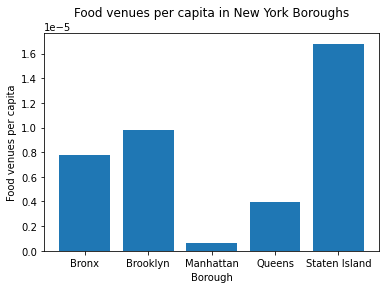

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

## plot Food venues per capita in bar graph
plt.bar(df.index,df['restaurant per capita'])
plt.title("Food venues per capita in New York Boroughs", y=1.05)
plt.ylabel("Food venues per capita")
plt.xlabel("Borough")

In [39]:
##Include land area collected from new york government 
landarea = [110,183.4,59.1,280,152]
df['land area'] = landarea
df['restaurant per area'] = df["# of Food venues"] / df["land area"]

Text(0.5, 0, 'Borough')

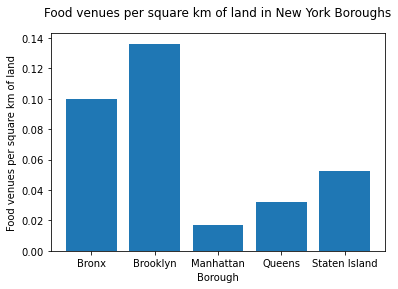

In [42]:
## plot Food venuse per square km of land in bar graph
plt.bar(df.index,df['restaurant per area'])
plt.title("Food venues per square km of land in New York Boroughs", y=1.05)
plt.ylabel("Food venues per square km of land")
plt.xlabel("Borough")